In [48]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
def uniform_weights(dists, epsilon):
    K = len(dists)
    return np.array([1/K]*K)

def reciprocal_weights(dists, epsilon = 1e-2):
    return 1/(np.sqrt(dists) + epsilon)

def gauss_weights(dists, *args):
    ed = np.exp(dists)
    return ed/np.sum(ed)

def accuracy(y,y_hat):
    return np.mean(y == y_hat)

def R2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2)/np.sum((y - y.mean())**2)

In [55]:
class KNN():
    def __init__(self,K, p = 2, weigh_function = uniform_weights, epsilon = 1e-2, mode = 0):
        self.K = K
        self.p = p
        self.weigh_function = weigh_function
        self.epsilon = epsilon
        self.mode = mode
        
    def fit(self, X, y):
        self.X = X 
        self.y = y 
    
    def predict(self, X):
        
        N = len(X)
        
        y_hat = np.zeros(N)
        
        for i in range(N):
            dists = np.sum((self.X - X[i])**2, axis = 1)
            idx = dists.argsort()[:self.K]   #the distance
            gamma = self.weigh_function(dists[idx],epsilon = self.epsilon)
            
            if self.mode:
                y_hat[i] = gamma.dot(self.y[idx])/gamma.sum()
            else:
                y_hat[i] = np.bincount(self.y[idx], weights = gamma).argmax() #bincount count the number of time for number in a list occurs    
        
        return y_hat

In [51]:
from matplotlib.colors import ListedColormap

In [52]:
def main():
    D = 2
    K = 3
    N = int(K*1e3)
    
    X0 = np.random.randn((N//K),D) + np.array([2,2])
    X1 = np.random.randn((N//K),D) + np.array([0, - 2])
    X2 = np.random.randn((N//K),D) + np.array([-2,2])
    X = np.vstack((X0, X1, X2))
    
    y = np.array([0]*(N//K)+[1]*(N//K)+[2]*(N//K))
    
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y, alpha = 0.5)
    plt.show()
    
    
    knn = KNN(9)
    knn.fit(X,y)
    y_hat = knn.predict(X)
    
    print(f'Trainninng acuuracy: {accuracy(y, y_hat):0.4f}')
    

In [69]:
def main_reg():
    N = 250
    
    X = np.linspace(0,20,N).reshape(N,1)
    
    y = 9.2322 + 8.2933*np.sqrt(X) -8.234 * np.exp(-(X-7.43)**2) - 0.989*np.exp(-(X - 2.90)) + np.random.randn(N, 1) * 1.7
    
    plt.figure()
    plt.scatter(X,y)
    plt.show()
    
    knn = KNN(K = 50, mode = 1)
    knn.fit(X,y)
    y_hat = knn.predict(X)
    
    print(f'Trainninng R_squared: {R2(y, y_hat):0.4f}')
    
    plt.figure()
    plt.scatter(X,y)
    plt.plot(X, y_hat, color = "r", linewidth = 2)
    plt.show()

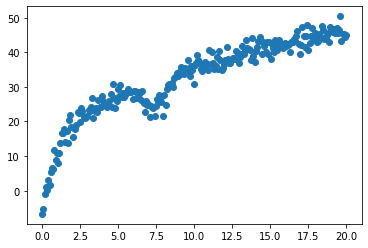

Trainninng R_squared: -426.7353


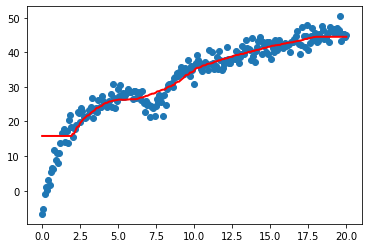

In [70]:
if __name__ == '__main__':
    main_reg()